In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("WineQT.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## EDA

In [5]:
plt.rcParams['figure.figsize'] = (10,2.5)
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

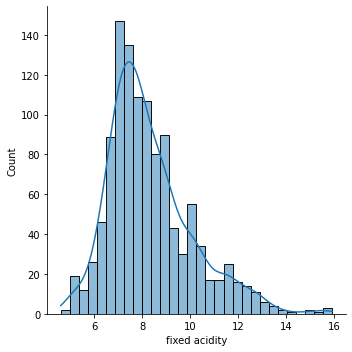

In [6]:
# fixed acidity
sns.displot(x = data['fixed acidity'], kde = True)

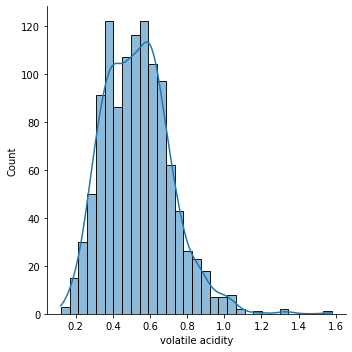

In [7]:
# volatile acidity
sns.displot(x = data['volatile acidity'], kde = True)

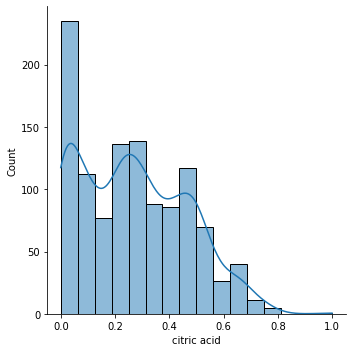

In [8]:
# citric acid
sns.displot(x = data['citric acid'], kde = True)

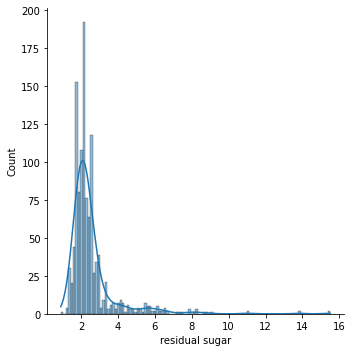

In [9]:
# residual sugar
sns.displot(x = data['residual sugar'], kde = True)

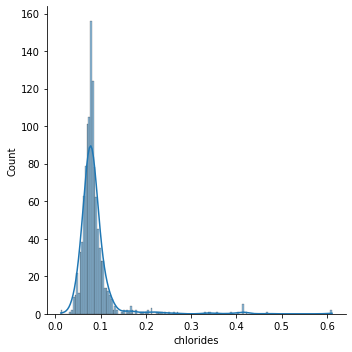

In [10]:
# chlorides
sns.displot(x = data['chlorides'], kde = True)

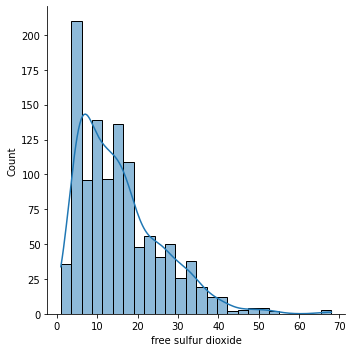

In [11]:
# free sulphur dioxide
sns.displot(x = data['free sulfur dioxide'], kde = True)

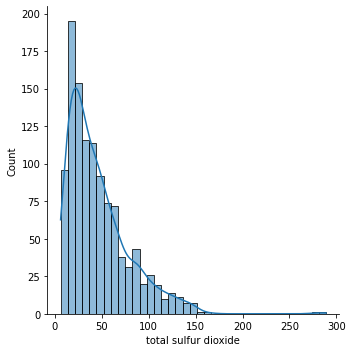

In [12]:
# total sulphur dioxide
sns.displot(x = data['total sulfur dioxide'], kde = True)

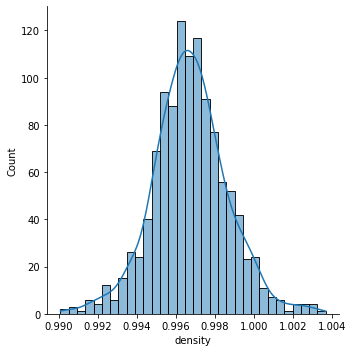

In [13]:
# density
sns.displot(x = data['density'], kde = True)

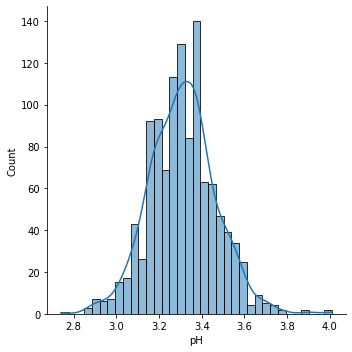

In [14]:
# pH
sns.displot(x = data['pH'], kde = True)

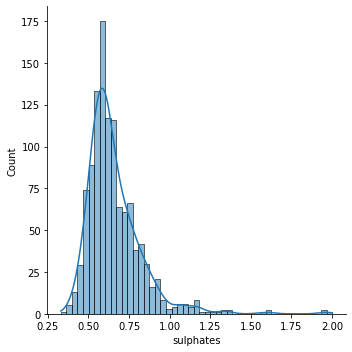

In [15]:
#sulphates
sns.displot(x = data['sulphates'], kde = True)

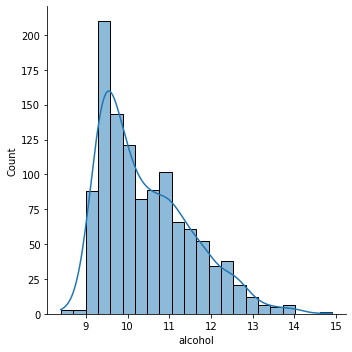

In [16]:
# alcohol
sns.displot(x = data['alcohol'], kde = True)

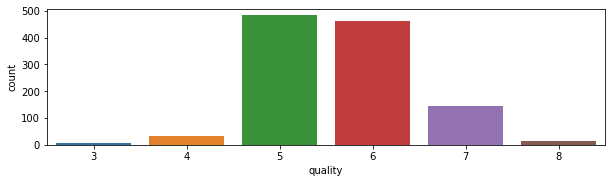

In [17]:
# quality
sns.countplot(x = data['quality'])

## Feature Engineering

In [19]:
data.drop('Id', axis = 1, inplace = True)

In [20]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

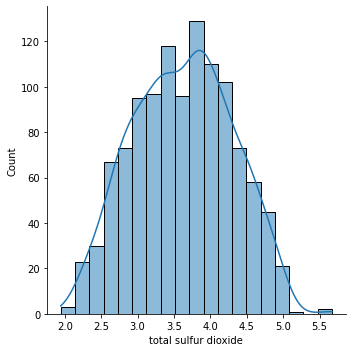

In [26]:
data['total sulfur dioxide'] = np.log1p(data['total sulfur dioxide'])
sns.displot(x = data['total sulfur dioxide'], kde = True)

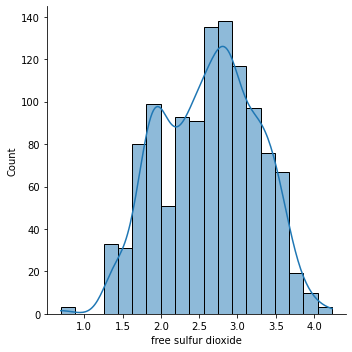

In [31]:
data['free sulfur dioxide'] = np.log1p(data['free sulfur dioxide'])
sns.displot(x = data['free sulfur dioxide'], kde = True)

## Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [35]:
X = data.drop('quality', axis =1 )
Y = data['quality']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [43]:
train_score = []
test_score = []
oob_scores = []

for i in range(100,251):
  model = RandomForestClassifier(n_estimators=i, min_samples_leaf = 5, min_samples_split = 7,
                                 oob_score= True)
  model.fit(xtrain, ytrain)
  train_score.append(model.score(xtrain,ytrain))
  test_score.append(model.score(xtest, ytest))
  oob_scores.append(model.oob_score_)
  print("Epoch: ", i)

Epoch:  100
Epoch:  101
Epoch:  102
Epoch:  103
Epoch:  104
Epoch:  105
Epoch:  106
Epoch:  107
Epoch:  108
Epoch:  109
Epoch:  110
Epoch:  111
Epoch:  112
Epoch:  113
Epoch:  114
Epoch:  115
Epoch:  116
Epoch:  117
Epoch:  118
Epoch:  119
Epoch:  120
Epoch:  121
Epoch:  122
Epoch:  123
Epoch:  124
Epoch:  125
Epoch:  126
Epoch:  127
Epoch:  128
Epoch:  129
Epoch:  130
Epoch:  131
Epoch:  132
Epoch:  133
Epoch:  134
Epoch:  135
Epoch:  136
Epoch:  137
Epoch:  138
Epoch:  139
Epoch:  140
Epoch:  141
Epoch:  142
Epoch:  143
Epoch:  144
Epoch:  145
Epoch:  146
Epoch:  147
Epoch:  148
Epoch:  149
Epoch:  150
Epoch:  151
Epoch:  152
Epoch:  153
Epoch:  154
Epoch:  155
Epoch:  156
Epoch:  157
Epoch:  158
Epoch:  159
Epoch:  160
Epoch:  161
Epoch:  162
Epoch:  163
Epoch:  164
Epoch:  165
Epoch:  166
Epoch:  167
Epoch:  168
Epoch:  169
Epoch:  170
Epoch:  171
Epoch:  172
Epoch:  173
Epoch:  174
Epoch:  175
Epoch:  176
Epoch:  177
Epoch:  178
Epoch:  179
Epoch:  180
Epoch:  181
Epoch:  182
Epoc

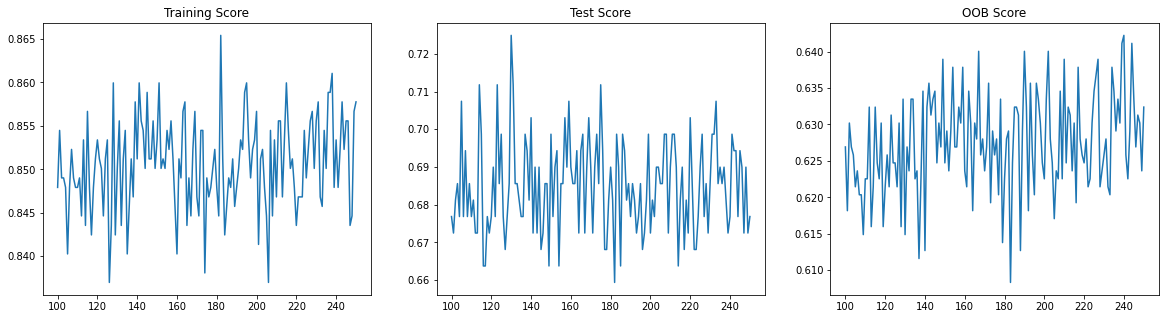

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=3)
plt.rcParams['figure.figsize'] = (20,5)
ax[0].plot(range(100,251), train_score)
ax[0].set_title("Training Score")
ax[1].plot(range(100,251), test_score)
ax[1].set_title("Test Score")
ax[2].plot(range(100,251), oob_scores)
ax[2].set_title("OOB Score")

plt.show()

In [45]:
from sklearn.feature_selection import RFECV
model = RandomForestClassifier(n_estimators=130, min_samples_leaf = 5, min_samples_split = 7,
                                 oob_score= True)

rfecv = RFECV(estimator= model, min_features_to_select= 5, cv = 10)
rfecv.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


RFECV(cv=10,
      estimator=RandomForestClassifier(min_samples_leaf=5, min_samples_split=7,
                                       n_estimators=130, oob_score=True),
      min_features_to_select=5)

In [48]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [49]:
rfecv.support_

array([ True,  True,  True, False, False, False,  True,  True, False,
        True,  True])

In [50]:
rfecv.n_features_

7

In [63]:
X_new = data[['fixed acidity', 'volatile acidity', 'citric acid', 'total sulfur dioxide','density', 'sulphates', 'alcohol']]
Y_new = data['quality']

In [58]:
X_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'total sulfur dioxide', 'density', 'sulphates', 'alcohol'],
      dtype='object')

In [64]:
xtrain_new, xtest_new, ytrain_new, ytest_new = train_test_split(X_new, Y_new, test_size = 0.2, random_state = 0)

In [65]:
model_new = RandomForestClassifier(n_estimators=130, min_samples_leaf = 5, min_samples_split = 7,
                                 oob_score= True)
model_new.fit(xtrain_new, ytrain_new)

RandomForestClassifier(min_samples_leaf=5, min_samples_split=7,
                       n_estimators=130, oob_score=True)

In [66]:
model_new.score(xtest_new, ytest_new)

0.6419213973799127

In [67]:
train_score = []
test_score = []
oob_scores = []

for i in range(100,251):
  model_new = RandomForestClassifier(n_estimators=i, min_samples_leaf = 5, min_samples_split = 7,
                                 oob_score= True)
  model_new.fit(xtrain_new, ytrain_new)
  train_score.append(model_new.score(xtrain_new,ytrain_new))
  test_score.append(model_new.score(xtest_new, ytest_new))
  oob_scores.append(model_new.oob_score_)
  print("Epoch: ", i)

Epoch:  100
Epoch:  101
Epoch:  102
Epoch:  103
Epoch:  104
Epoch:  105
Epoch:  106
Epoch:  107
Epoch:  108
Epoch:  109
Epoch:  110
Epoch:  111
Epoch:  112
Epoch:  113
Epoch:  114
Epoch:  115
Epoch:  116
Epoch:  117
Epoch:  118
Epoch:  119
Epoch:  120
Epoch:  121
Epoch:  122
Epoch:  123
Epoch:  124
Epoch:  125
Epoch:  126
Epoch:  127
Epoch:  128
Epoch:  129
Epoch:  130
Epoch:  131
Epoch:  132
Epoch:  133
Epoch:  134
Epoch:  135
Epoch:  136
Epoch:  137
Epoch:  138
Epoch:  139
Epoch:  140
Epoch:  141
Epoch:  142
Epoch:  143
Epoch:  144
Epoch:  145
Epoch:  146
Epoch:  147
Epoch:  148
Epoch:  149
Epoch:  150
Epoch:  151
Epoch:  152
Epoch:  153
Epoch:  154
Epoch:  155
Epoch:  156
Epoch:  157
Epoch:  158
Epoch:  159
Epoch:  160
Epoch:  161
Epoch:  162
Epoch:  163
Epoch:  164
Epoch:  165
Epoch:  166
Epoch:  167
Epoch:  168
Epoch:  169
Epoch:  170
Epoch:  171
Epoch:  172
Epoch:  173
Epoch:  174
Epoch:  175
Epoch:  176
Epoch:  177
Epoch:  178
Epoch:  179
Epoch:  180
Epoch:  181
Epoch:  182
Epoc

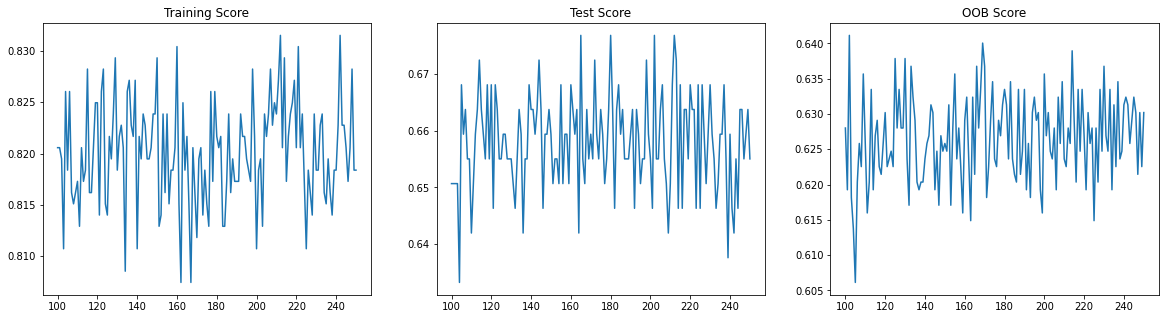

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3)
plt.rcParams['figure.figsize'] = (20,5)
ax[0].plot(range(100,251), train_score)
ax[0].set_title("Training Score")
ax[1].plot(range(100,251), test_score)
ax[1].set_title("Test Score")
ax[2].plot(range(100,251), oob_scores)
ax[2].set_title("OOB Score")

plt.show()